# Predictive modeling of customer booking

## Introduction

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Libraries have been imported

## Loading the dataset

In [2]:
flight_bookings_df = pd.read_csv("../data/customer_booking.csv", encoding="ISO-8859-1")

The `dataset` has been loaded and stored in the variable name `flight_bookings_df`

## Data exploration & cleaning

In [3]:
flight_bookings_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The dataset contains information about flight details that were obtained from customers booking flight tickets. Information regarding how many passengers and where they were doing their bookings,type of trip and other information. Ultimately if they ended up making the booking or not.

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [4]:
flight_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

There are 14 columns and 50,000 rows in the dataset. There are no null values in any column. 9 columns contain numerical responses whilst 5 contain string responses.

To convert some numerical responses to responses that make intuitive sense, a mapping is to be made. 

In [5]:
mapping={0:'No',1:'Yes'}
flight_bookings_df['wants_extra_baggage']=flight_bookings_df['wants_extra_baggage'].replace(mapping)
flight_bookings_df['wants_in_flight_meals']=flight_bookings_df['wants_in_flight_meals'].replace(mapping)
flight_bookings_df['wants_preferred_seat']=flight_bookings_df['wants_preferred_seat'].replace(mapping)
flight_bookings_df['booking_complete']=flight_bookings_df['booking_complete'].replace(mapping)

The mapping has been done on relevant columns.

In [6]:
flight_bookings_df.describe().round(2)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
count,50000.00,50000.00,50000.00,50000.00,50000.00
mean,1.59,84.94,23.04,9.07,7.28
std,1.02,90.45,33.89,5.41,1.50
min,1.00,0.00,0.00,0.00,4.67
25%,1.00,21.00,5.00,5.00,5.62
50%,1.00,51.00,17.00,9.00,7.57
75%,2.00,115.00,28.00,13.00,8.83
max,9.00,867.00,778.00,23.00,9.50


 - Majority of the number of passengers selected is 1, the average number of passengers is close to 2 passengers. Standard deviation is 1, implying more than 68% of the number of passengers lie between either 1 or 2 passengers.

 - The average number of days before the date of depature that people looking to make bookings is clode to 85 days. More than 68% of the passengers look to book their tickets between 0 and 174 days before depature date. 50% of passengers look to book their tickets less than 51 days before depature date.

 - The average length of stay is 23 days, 68% of the passengers choose between 0 and 66 length of stay. More than 50% of the passengers choose length of stay below 17 days.

 - The majority of flights before 9 am. 68% of the passengers take flights that are between 4:24 am and 2:24 pm. The average flight time is at 9 am.

 - The average duration of the flights is 7 hours and 16 minutes. 68% of the flights take between 5 hours, 47 minutes and 8 hours, 47 minutes. Most flight durations take less than 7 hours and 34 minutes.

In [7]:
flight_bookings_df.describe(exclude='number')

,sales_channel,trip_type,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
count,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,2,3,7,799,104,2,2,2,2
top,Internet,RoundTrip,Mon,AKLKUL,Australia,Yes,No,No,No
freq,44382,49497,8102,2680,17872,33439,35152,28643,42522


 - The most popular sales channel is the internet, with over 88& percent of potential passengers prefering that method.
 
 - The most viewed tickets are round trip tickets with over 98% of potential passengers choosing that option.
 - The most frequent travel date is Monday with over 16% of passengers choosing the option. 
 - Around 5% of the route take by flights is AKLKUL.
 - Around 35.7% of the bookings are made from AUstralia.
 - 66.9% of potential passengers require extra baggage.
 - 70% of potential passengers do not choose a preffered sit,
 - 57% of potential passengers do not want meals in the flight.
 - 85% of the potential passengers do not end up booking the flight tickets.

### Checking for duplicates

In [8]:
len(flight_bookings_df[(flight_bookings_df.duplicated()) & (flight_bookings_df['booking_complete']=='No')])

632

There are rows that are duplicates of each other, where every single detail about the flight bookings being the same. The unavailability of unique identifiers of the data leads to suspect that this was the same person trying to book the same flight multiple times, as it is unlikely for different unrelated people to have the same information across the board. These rows shall be dropped.

In [9]:
cleaned_flight_bookings_df=flight_bookings_df.drop(flight_bookings_df[(flight_bookings_df.duplicated()) & (flight_bookings_df['booking_complete']=='No')].index)

Duplicated rows have been dropped.

In [10]:
len(cleaned_flight_bookings_df)

49368

The dataset is as expected

A function for plotting the distributions is to be created, to avoid having to reproduce the same code across multiple code cells.

In [11]:
def distribution_plotter(df,feature):
    sns.histplot(data=df,x=feature,hue='booking_complete')
    plt.title(f'Distribution of {feature} displaying booking complete status',weight='bold')
    plt.xlabel(feature,weight="bold")
    plt.show()


The function has been created and named `distribution_plotter`

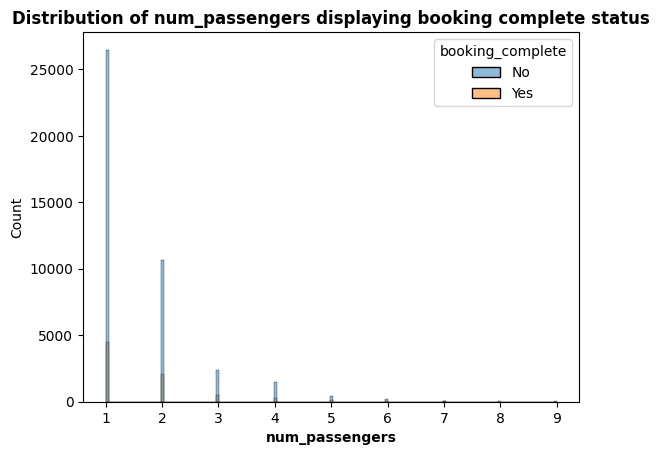

In [12]:
distribution_plotter(cleaned_flight_bookings_df,'num_passengers')

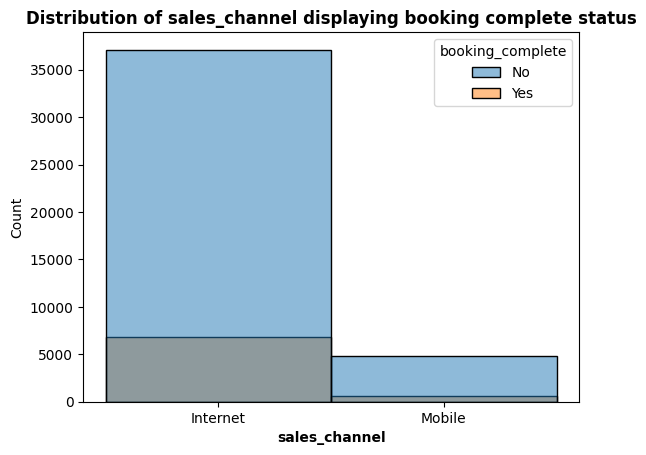

In [13]:
distribution_plotter(cleaned_flight_bookings_df,'sales_channel')

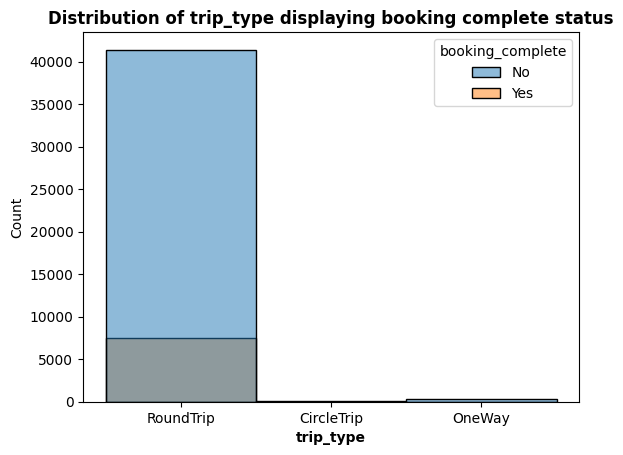

In [14]:
distribution_plotter(cleaned_flight_bookings_df,'trip_type')

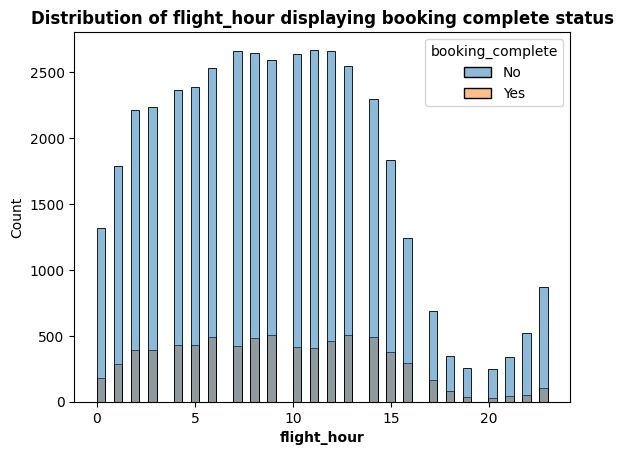

In [15]:
distribution_plotter(cleaned_flight_bookings_df,'flight_hour')

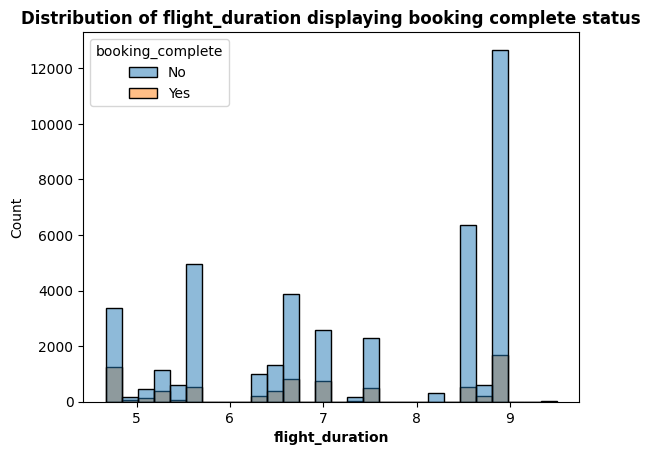

In [16]:
distribution_plotter(cleaned_flight_bookings_df,'flight_duration')

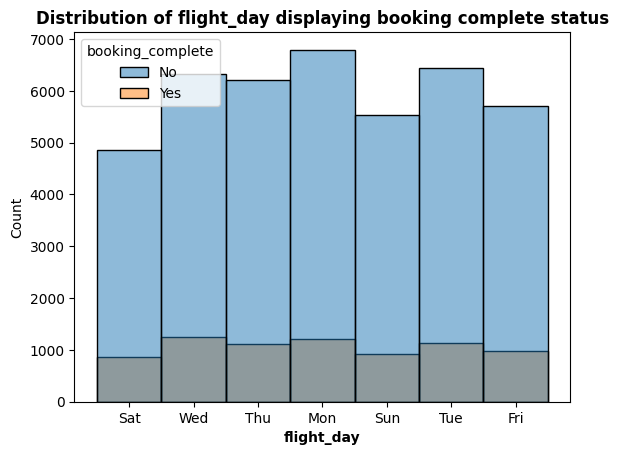

In [17]:
distribution_plotter(cleaned_flight_bookings_df,'flight_day')

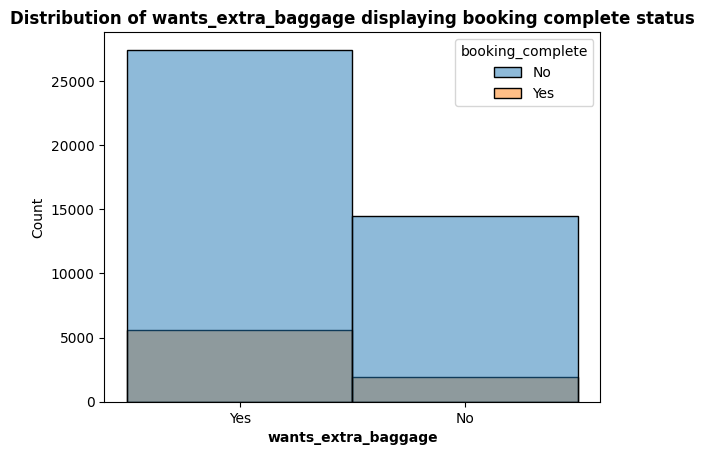

In [18]:
distribution_plotter(cleaned_flight_bookings_df,'wants_extra_baggage')

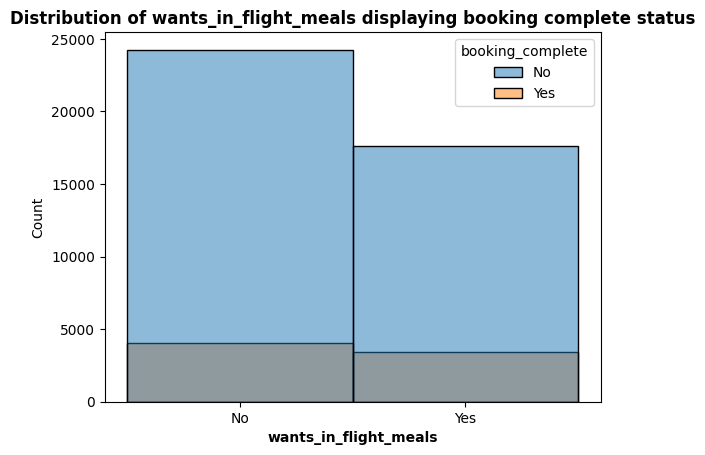

In [19]:
distribution_plotter(cleaned_flight_bookings_df,'wants_in_flight_meals')

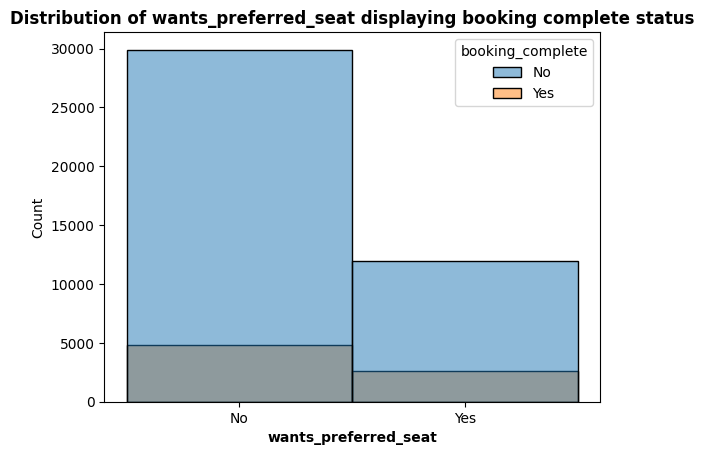

In [20]:
distribution_plotter(cleaned_flight_bookings_df,'wants_preferred_seat')

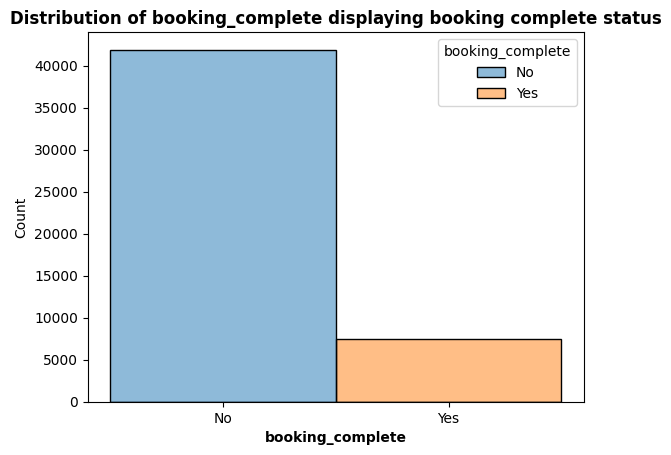

In [21]:
distribution_plotter(cleaned_flight_bookings_df,'booking_complete')

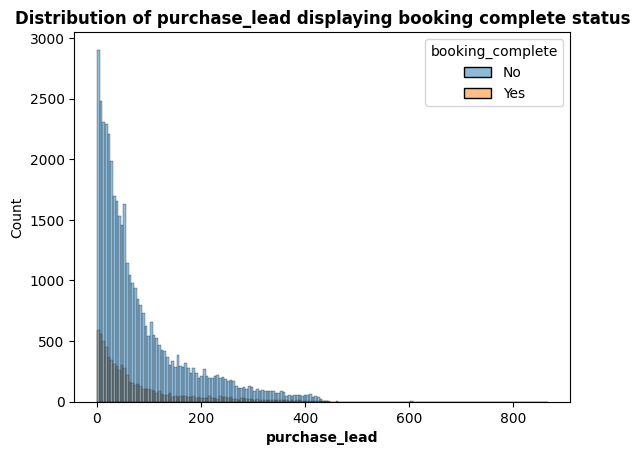

In [22]:
distribution_plotter(cleaned_flight_bookings_df,'purchase_lead')

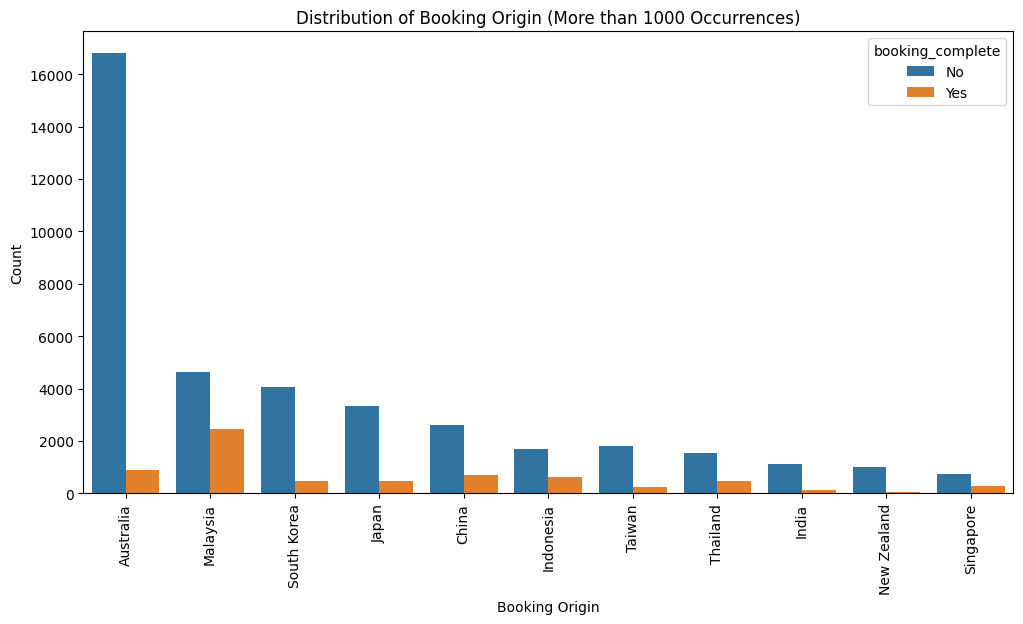

In [23]:
booking_origin_counts = cleaned_flight_bookings_df["booking_origin"].value_counts()

popular_origins = booking_origin_counts[booking_origin_counts > 1000].index


filtered_df =cleaned_flight_bookings_df[cleaned_flight_bookings_df["booking_origin"].isin(popular_origins)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="booking_origin", order=popular_origins,hue='booking_complete')
plt.xticks(rotation=90)
plt.title("Distribution of Booking Origin (More than 1000 Occurrences)")
plt.xlabel("Booking Origin")
plt.ylabel("Count")
plt.show()


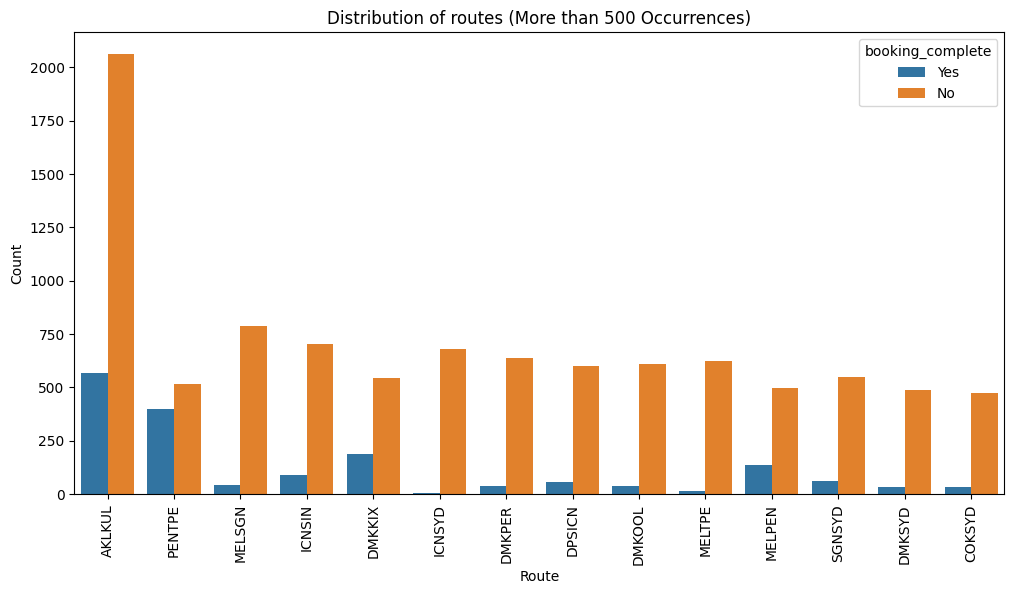

In [24]:
route_counts = cleaned_flight_bookings_df["route"].value_counts()

popular_routes = route_counts[route_counts > 500].index


filtered_df =cleaned_flight_bookings_df[cleaned_flight_bookings_df["route"].isin(popular_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="route", order=popular_routes,hue='booking_complete')
plt.xticks(rotation=90)
plt.title("Distribution of routes (More than 500 Occurrences)")
plt.xlabel("Route")
plt.ylabel("Count")
plt.show()

In [25]:
target = "booking_complete"
features = cleaned_flight_bookings_df.drop(columns=[target])

In [26]:
categorical_features = features.select_dtypes(include=["object"]).columns
numerical_features = features.select_dtypes(include=["int64", "float64"]).columns

In [27]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_categorical = encoder.fit_transform(features[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))


In [28]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(features[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)


In [29]:
X = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)
y = cleaned_flight_bookings_df[target]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy

0.8477820538788738

In [34]:
report

'              precision    recall  f1-score   support\n\n          No       0.86      0.98      0.92      8334\n         Yes       0.55      0.14      0.22      1540\n\n    accuracy                           0.85      9874\n   macro avg       0.70      0.56      0.57      9874\nweighted avg       0.81      0.85      0.81      9874\n'